Summary Statistics On Numeric Variables

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
pd.set_option("display.precision", 2)

Read Dataset

In [78]:
df = pd.read_csv("world_population.csv")
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,4.11e+07,3.90e+07,3.38e+07,2.82e+07,1.95e+07,1.07e+07,1.25e+07,1.08e+07,6.52e+05,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2.84e+06,2.87e+06,2.88e+06,2.91e+06,3.18e+06,3.30e+06,2.94e+06,2.32e+06,2.87e+04,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,4.49e+07,4.35e+07,3.95e+07,3.59e+07,3.08e+07,2.55e+07,1.87e+07,1.38e+07,2.38e+06,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,4.43e+04,4.62e+04,5.14e+04,5.48e+04,5.82e+04,4.78e+04,3.29e+04,2.71e+04,1.99e+02,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,7.98e+04,7.77e+04,7.17e+04,7.15e+04,6.61e+04,5.36e+04,3.56e+04,1.99e+04,4.68e+02,170.56,1.01,0.00


Display First 20 rows in table

In [79]:
df.head(20)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,4.11e+07,3.90e+07,3.38e+07,2.82e+07,1.95e+07,1.07e+07,1.25e+07,1.08e+07,6.52e+05,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2.84e+06,2.87e+06,2.88e+06,2.91e+06,3.18e+06,3.30e+06,2.94e+06,2.32e+06,2.87e+04,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,4.49e+07,4.35e+07,3.95e+07,3.59e+07,3.08e+07,2.55e+07,1.87e+07,1.38e+07,2.38e+06,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,4.43e+04,4.62e+04,5.14e+04,5.48e+04,5.82e+04,4.78e+04,3.29e+04,2.71e+04,1.99e+02,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,7.98e+04,7.77e+04,7.17e+04,7.15e+04,6.61e+04,5.36e+04,3.56e+04,1.99e+04,4.68e+02,170.56,1.01,0.00
5,42,AGO,Angola,Luanda,Africa,3.56e+07,3.34e+07,2.81e+07,2.34e+07,1.64e+07,1.18e+07,8.33e+06,6.03e+06,1.25e+06,28.55,1.03,0.45
6,224,AIA,Anguilla,The Valley,North America,1.59e+04,1.56e+04,1.45e+04,1.32e+04,1.10e+04,8.32e+03,6.56e+03,6.28e+03,9.10e+01,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,9.38e+04,9.27e+04,8.99e+04,8.57e+04,7.51e+04,6.33e+04,6.49e+04,6.45e+04,4.42e+02,212.13,1.01,0.00
8,33,ARG,Argentina,Buenos Aires,South America,4.55e+07,4.50e+07,4.33e+07,4.11e+07,3.71e+07,3.26e+07,2.80e+07,2.38e+07,2.78e+06,16.37,1.01,0.57
9,140,ARM,Armenia,Yerevan,Asia,2.78e+06,2.81e+06,2.88e+06,2.95e+06,3.17e+06,3.56e+06,3.14e+06,2.53e+06,2.97e+04,93.48,1.00,0.03


Display Last 20 rows in table

In [80]:
df.tail(20)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
214,111,TKM,Turkmenistan,Ashgabat,Asia,6.43e+06,6.25e+06,5.77e+06,5.27e+06,4.57e+06,3.72e+06,2.86e+06,2.20e+06,4.88e+05,13.18,1.01,0.08
215,212,TCA,Turks and Caicos Islands,Cockburn Town,North America,4.57e+04,4.43e+04,3.65e+04,2.97e+04,1.87e+04,1.17e+04,7.60e+03,5.66e+03,9.48e+02,48.21,1.01,0.00
216,227,TUV,Tuvalu,Funafuti,Oceania,1.13e+04,1.11e+04,1.09e+04,1.06e+04,9.64e+03,9.18e+03,7.73e+03,5.81e+03,2.60e+01,435.08,1.01,0.00
217,31,UGA,Uganda,Kampala,Africa,4.72e+07,4.44e+07,3.75e+07,3.23e+07,2.40e+07,1.76e+07,1.33e+07,1.03e+07,2.42e+05,195.61,1.03,0.59
218,38,UKR,Ukraine,Kiev,Europe,3.97e+07,4.39e+07,4.50e+07,4.57e+07,4.89e+07,5.16e+07,5.00e+07,4.73e+07,6.04e+05,65.79,0.91,0.50
219,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9.44e+06,9.29e+06,8.92e+06,8.48e+06,3.28e+06,1.90e+06,1.01e+06,2.98e+05,8.36e+04,112.93,1.01,0.12
220,21,GBR,United Kingdom,London,Europe,6.75e+07,6.71e+07,6.52e+07,6.28e+07,5.89e+07,5.72e+07,5.63e+07,5.57e+07,2.43e+05,277.93,1.00,0.85
221,3,USA,United States,"Washington, D.C.",North America,3.38e+08,3.36e+08,3.25e+08,3.11e+08,2.82e+08,2.48e+08,2.23e+08,2.00e+08,9.37e+06,36.09,1.00,4.24
222,200,VIR,United States Virgin Islands,Charlotte Amalie,North America,9.95e+04,1.00e+05,1.03e+05,1.06e+05,1.08e+05,1.01e+05,9.66e+04,6.34e+04,3.47e+02,286.64,0.99,0.00
223,133,URY,Uruguay,Montevideo,South America,3.42e+06,3.43e+06,3.40e+06,3.35e+06,3.29e+06,3.12e+06,2.95e+06,2.79e+06,1.81e+05,18.91,1.00,0.04


Print Information

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

Exploratory Data Analysis

In [82]:
print(df.describe())

         Rank  2022 Population  2020 Population  2015 Population  \
count  234.00         2.30e+02         2.33e+02         2.30e+02   
mean   117.50         3.46e+07         3.36e+07         3.21e+07   
std     67.69         1.38e+08         1.36e+08         1.32e+08   
min      1.00         5.10e+02         5.20e+02         5.64e+02   
25%     59.25         4.20e+05         4.06e+05         3.94e+05   
50%    117.50         5.76e+06         5.46e+06         5.24e+06   
75%    175.75         2.27e+07         2.15e+07         1.97e+07   
max    234.00         1.43e+09         1.42e+09         1.39e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count         2.27e+02         2.27e+02         2.29e+02         2.29e+02   
mean          3.03e+07         2.68e+07         1.93e+07         1.63e+07   
std           1.26e+08         1.13e+08         8.13e+07         6.93e+07   
min           5.96e+02         6.51e+02         7.00e+02         7.33e+02   
25

Target Variable

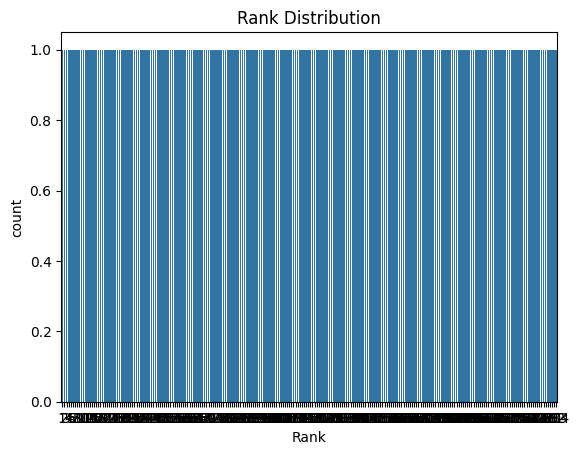

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Rank', data=df)
plt.title("Rank Distribution")
plt.show()

Print dataset dimensions

In [84]:
print(df.shape)

(234, 17)


Print name of columns

In [85]:
print(df.columns)

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')


Print name of rows

In [86]:
print(df.rpow)

<bound method DataFrame.rpow of      Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           4.11e+07         3.90e+07         3.38e+07         2.82e+07   
1           2.84e+06         2.87e+06

Missing Values

In [87]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

Show last line of the dataframe

In [88]:
df[-1:]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
233,74,ZWE,Zimbabwe,Harare,Africa,1.63e+07,1.57e+07,1.42e+07,1.28e+07,1.18e+07,1.01e+07,7.05e+06,5.20e+06,390757.0,41.77,1.02,0.2


Index Number

In [89]:
df.iloc[2:8, 3:5]

,Capital,Continent
2,Algiers,Africa
3,Pago Pago,Oceania
4,Andorra la Vella,Europe
5,Luanda,Africa
6,The Valley,North America
7,Saint John’s,North America


Sort By Country

In [90]:
df.sort_values(by="Country", ascending=False).head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
233,74,ZWE,Zimbabwe,Harare,Africa,1.63e+07,1.57e+07,1.42e+07,1.28e+07,1.18e+07,1.01e+07,7.05e+06,5.20e+06,390757.0,41.77,1.02,0.20
232,63,ZMB,Zambia,Lusaka,Africa,2.00e+07,1.89e+07,NaN,1.38e+07,9.89e+06,7.69e+06,5.72e+06,4.28e+06,752612.0,26.60,1.03,0.25
231,46,YEM,Yemen,Sanaa,Asia,3.37e+07,3.23e+07,2.85e+07,2.47e+07,1.86e+07,1.34e+07,9.20e+06,6.84e+06,527968.0,63.82,1.02,0.42
230,172,ESH,Western Sahara,El Aaiún,Africa,5.76e+05,5.56e+05,4.92e+05,4.13e+05,2.70e+05,1.79e+05,1.17e+05,7.64e+04,266000.0,2.17,1.02,0.01
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,1.16e+04,1.17e+04,1.22e+04,1.31e+04,1.47e+04,1.35e+04,1.13e+04,9.38e+03,142.0,81.49,1.00,0.00


Calculate Fractions

In [91]:
df["Rank"].value_counts(normalize=True)

Rank
36     4.27e-03
138    4.27e-03
34     4.27e-03
213    4.27e-03
203    4.27e-03
         ...   
226    4.27e-03
172    4.27e-03
46     4.27e-03
63     4.27e-03
74     4.27e-03
Name: proportion, Length: 234, dtype: float64

Indexing Data

In [92]:
df["Growth Rate"].mean()

np.float64(1.0095534482758621)

Display The Fifth Column Of Table

In [93]:
df['Continent']

0         Asia
1       Europe
2       Africa
3      Oceania
4       Europe
        ...   
229    Oceania
230     Africa
231       Asia
232     Africa
233     Africa
Name: Continent, Length: 234, dtype: object

HeatMap for missing variables

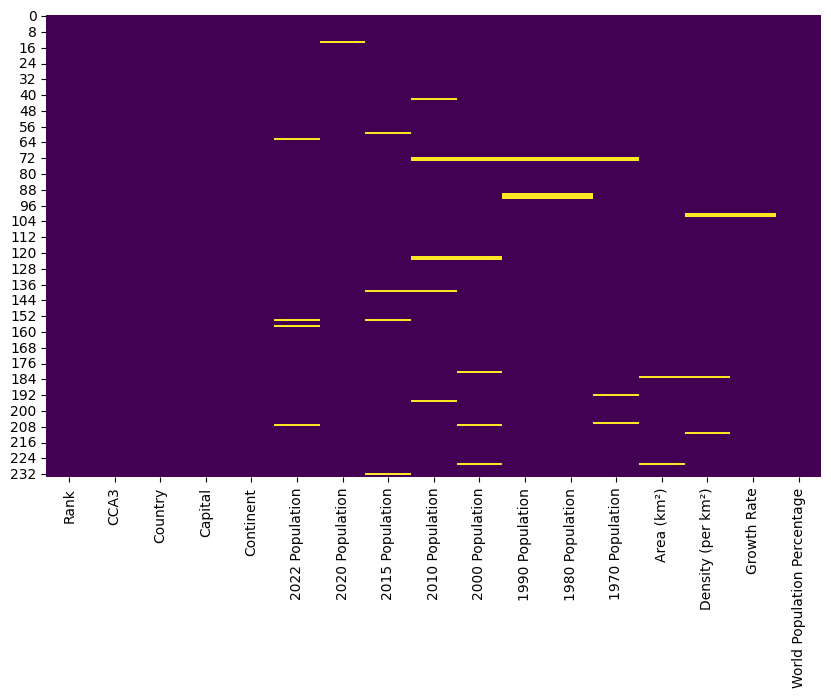

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()

Histogram From Table

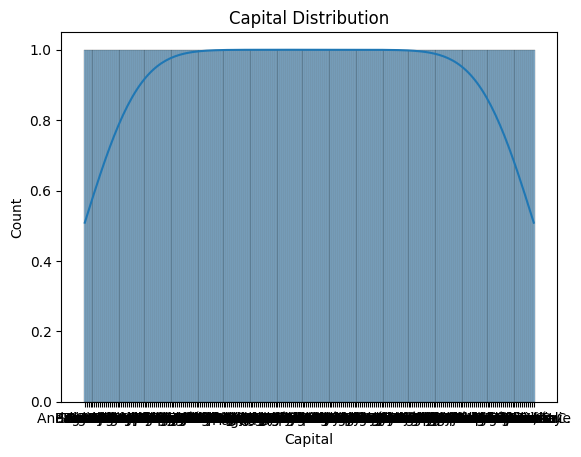

In [95]:
sns.histplot(df["Capital"], bins=30, kde=True)
plt.title("Capital Distribution")
plt.show()

Print Index of Table

In [96]:
df.index

RangeIndex(start=0, stop=234, step=1)

Slice Rows From 10th To 13th position

In [97]:
df[10:14]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
10,198,ABW,Aruba,Oranjestad,North America,1.06e+05,1.07e+05,1.04e+05,1.00e+05,8.91e+04,6.57e+04,6.23e+04,5.91e+04,1.80e+02,591.36,1.00,0.00
11,55,AUS,Australia,Canberra,Oceania,2.62e+07,2.57e+07,2.38e+07,2.20e+07,1.90e+07,1.70e+07,1.47e+07,1.26e+07,7.69e+06,3.40,1.01,0.33
12,99,AUT,Austria,Vienna,Europe,8.94e+06,8.91e+06,8.64e+06,8.36e+06,8.01e+06,7.68e+06,7.55e+06,7.47e+06,8.39e+04,106.59,1.00,0.11
13,91,AZE,Azerbaijan,Baku,Asia,1.04e+07,NaN,9.86e+06,9.24e+06,8.19e+06,7.43e+06,6.38e+06,5.43e+06,8.66e+04,119.61,1.00,0.13


Manipulate Data in Table

In [98]:
df.max(axis=0)

Rank                                     234
CCA3                                     ZWE
Country                             Zimbabwe
Capital                               Zagreb
Continent                      South America
2022 Population                 1425887337.0
2020 Population                 1424929781.0
2015 Population                 1393715448.0
2010 Population                 1348191368.0
2000 Population                 1264099069.0
1990 Population                 1153704252.0
1980 Population                  982372466.0
1970 Population                  822534450.0
Area (km²)                        17098242.0
Density (per km²)                   23172.27
Growth Rate                             1.07
World Population Percentage            17.88
dtype: object

Print DataTypes In Table

In [99]:
print(df.dtypes)

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object


Find Details Where Country Starts With A

In [100]:
df[df["Country"].map(lambda x: x.startswith('A'))].head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,4.11e+07,3.90e+07,3.38e+07,2.82e+07,1.95e+07,1.07e+07,1.25e+07,1.08e+07,6.52e+05,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2.84e+06,2.87e+06,2.88e+06,2.91e+06,3.18e+06,3.30e+06,2.94e+06,2.32e+06,2.87e+04,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,4.49e+07,4.35e+07,3.95e+07,3.59e+07,3.08e+07,2.55e+07,1.87e+07,1.38e+07,2.38e+06,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,4.43e+04,4.62e+04,5.14e+04,5.48e+04,5.82e+04,4.78e+04,3.29e+04,2.71e+04,1.99e+02,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,7.98e+04,7.77e+04,7.17e+04,7.15e+04,6.61e+04,5.36e+04,3.56e+04,1.99e+04,4.68e+02,170.56,1.01,0.00


Mean of Growth Rate

In [101]:
print("Mean: ",df["Growth Rate"].mean())

Mean:  1.0095534482758621


Maximum of Growth Rate

In [102]:
print("Maximum:",df['Growth Rate'].max())

Maximum: 1.0691


Minimum of Growth Rate

In [103]:
print("Minimum:",df['Growth Rate'].min())

Minimum: 0.912


Skip First 20 Rows in Table

In [104]:
df = pd.read_csv('world_population.csv', skiprows = 20)
df

,81,BEL,Belgium,Brussels,Europe,11655930,11561717,11248303,10877947,10264343,9959560,9828986,9629376,30528,381.8111,1.0038,0.15
0,177,BLZ,Belize,Belmopan,North America,4.05e+05,394921,3.60e+05,3.22e+05,2.40e+05,1.83e+05,1.45e+05,1.21e+05,2.30e+04,17.65,1.01,0.01
1,77,BEN,Benin,Porto-Novo,Africa,1.34e+07,12643123,1.09e+07,9.45e+06,7.00e+06,5.13e+06,3.83e+06,3.02e+06,1.13e+05,118.56,1.03,0.17
2,206,BMU,Bermuda,Hamilton,North America,6.42e+04,64031,6.31e+04,6.34e+04,6.14e+04,5.75e+04,5.36e+04,5.20e+04,5.40e+01,1188.59,1.00,0.00
3,165,BTN,Bhutan,Thimphu,Asia,7.82e+05,772506,7.43e+05,7.06e+05,5.87e+05,5.58e+05,4.15e+05,2.99e+05,3.84e+04,20.38,1.01,0.01
4,80,BOL,Bolivia,Sucre,South America,1.22e+07,11936162,1.11e+07,1.02e+07,8.59e+06,7.10e+06,5.74e+06,4.59e+06,1.10e+06,11.13,1.01,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,1.16e+04,11655,1.22e+04,1.31e+04,1.47e+04,1.35e+04,1.13e+04,9.38e+03,1.42e+02,81.49,1.00,0.00
210,172,ESH,Western Sahara,El Aaiún,Africa,5.76e+05,556048,4.92e+05,4.13e+05,2.70e+05,1.79e+05,1.17e+05,7.64e+04,2.66e+05,2.17,1.02,0.01
211,46,YEM,Yemen,Sanaa,Asia,3.37e+07,32284046,2.85e+07,2.47e+07,1.86e+07,1.34e+07,9.20e+06,6.84e+06,5.28e+05,63.82,1.02,0.42
212,63,ZMB,Zambia,Lusaka,Africa,2.00e+07,18927715,NaN,1.38e+07,9.89e+06,7.69e+06,5.72e+06,4.28e+06,7.53e+05,26.60,1.03,0.25
